<center>
<img src="https://wpsovet.ru/wp-content/uploads/1/6/4/1642a836ada1355f35ef577d9024a728.jpg" width="700"> 

# Андан на экономе: домашнее задание 2
</center>

## Импорт необходимых библиотек 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

from itertools import combinations


# Часть 1: рисковая 

В этом задании мы немного поработаем с ценами на акции. За задание можно получить $50$ баллов.

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices

(2518, 521)


Date           A        AAL         AAP        AAPL  \
0     2013-03-05 00:00:00   27.946215  13.245518   71.640678   13.298839   
1     2013-03-06 00:00:00   28.326160  13.735741   70.923820   13.129805   
2     2013-03-07 00:00:00   28.332716  13.971428   70.961044   13.281566   
3     2013-03-08 00:00:00   28.188597  14.065701   71.538284   13.316731   
4     2013-03-11 00:00:00   28.044483  14.263680   72.180695   13.506428   
...                   ...         ...        ...         ...         ...   
2513  2023-02-27 00:00:00  142.179993  15.630000  140.630005  147.919998   
2514  2023-02-28 00:00:00  141.970001  15.980000  144.960007  147.410004   
2515  2023-03-01 00:00:00  137.509995  16.030001  138.820007  145.309998   
2516  2023-03-02 00:00:00  141.669998  16.120001  139.210007  145.910004   
2517  2023-03-03 00:00:00  143.929993  16.360001  138.479996  151.029999   

            ABBV         ABC        ABNB         ABT       ACGL  ...  \
0      24.972109   41.335518         NaN   28.678448  16.563334  ...   
1      25.125229   41.515339         NaN   28.347576  16.583332  ...   
2      24.958796   41.172813         NaN   28.479918  16.813334  ...   
3      24.858923   41.515339         NaN   28.686729  16.879999  ...   
4      25.078619   41.575287         NaN   28.893517  16.940001  ...   
...          ...         ...         ...         ...        ...  ...   
2513  154.279999  156.630005  123.529999   99.769997  69.209999  ...   
2514  153.899994  155.559998  123.279999  101.720001  70.000000  ...   
2515  155.270004  156.509995  120.830002  100.830002  70.970001  ...   
2516  154.380005  154.899994  122.379997  102.629997  70.900002  ...   
2517  156.059998  156.149994  125.730003  104.449997  71.300003  ...   

             XOM       XRAY         XYL         YUM         ZBH        ZBRA  \
0      58.596577  39.023003   24.914204   39.376095   67.826096   44.869999   
1      58.563908  39.283100   25.693598   39.738384   67.343094   44.790001   
2      58.008087  39.515335   24.870417   39.940308   66.985306   44.619999   
3      58.178085  39.701115   24.896696   40.219440   67.441467   45.040001   
4      58.302341  39.812572   25.185684   40.290707   67.745613   45.470001   
...          ...        ...         ...         ...         ...         ...   
2513  110.550003  34.549999  102.550003  126.570000  123.300003  296.230011   
2514  109.910004  38.070000  102.650002  127.160004  123.870003  300.250000   
2515  110.889999  37.360001  101.089996  126.199997  122.080002  302.339996   
2516  111.400002  37.680000  102.250000  128.679993  122.989998  306.059998   
2517  112.809998  38.740002  103.919998  129.669998  126.220001  309.450012   

           ZION         ZM          ZS         ZTS  
0     20.423979        NaN         NaN   31.940346  
1     20.907482        NaN         NaN   31.530493  
2     21.057535        NaN         NaN   32.191845  
3     21.090885        NaN         NaN   31.754053  
4     21.365984        NaN         NaN   31.837889  
...         ...        ...         ...         ...  
2513  50.389999  73.720001  131.839996  165.470001  
2514  50.619999  74.589996  131.149994  167.000000  
2515  50.439999  69.620003  128.440002  167.570007  
2516  48.310001  70.629997  134.130005  168.580002  
2517  49.230000  70.809998  119.239998  170.559998  

[2518 rows x 521 columns]

In [3]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


Symbol                  Security SEC filings             GICS Sector  \
0      A  Agilent Technologies Inc     reports             Health Care   
1    AAL   American Airlines Group     reports             Industrials   
2    AAP        Advance Auto Parts     reports  Consumer Discretionary   
3   AAPL                Apple Inc.     reports  Information Technology   
4   ABBV               AbbVie Inc.     reports             Health Care   

                            GICS Sub Industry    Headquarters Location  \
0                       Health Care Equipment  Santa Clara, California   
1                                    Airlines        Fort Worth, Texas   
2                           Automotive Retail  Raleigh, North Carolina   
3  Technology Hardware, Storage & Peripherals    Cupertino, California   
4                             Pharmaceuticals  North Chicago, Illinois   

  Date first added        CIK  Founded  S&P-500  NASDAQ    DJI  
0         05.06.00  1090872.0   1999.0     True   False  False  
1         23.03.15     6201.0   1934.0     True   False  False  
2         09.07.15  1158449.0   1932.0     True   False  False  
3         30.11.82   320193.0   1977.0     True    True   True  
4         31.12.12  1551152.0   1888.0     True   False  False

## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [4]:
df_prices.Date = pd.to_datetime(df_prices.Date)  #меняем тип данныхкак
df_prices = df_prices.set_index("Date")

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [5]:
num_stocks = df_inf.loc[df_inf.NASDAQ == True].shape[0]
print(num_stocks)

103


Сколько ценных бумаг входят во все три индекса сразу?

In [6]:
num_stock3 = df_inf[(df_inf.NASDAQ == True) & (df_inf["S&P-500"] == True) & (df_inf.DJI == True)].shape[0]
print(num_stock3)

5


В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [7]:
num_19cent = len(df_inf[(df_inf["S&P-500"] == True) & (1800 <= df_inf.Founded) & (df_inf.Founded < 1900)].index)
print(num_19cent)

95


В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [8]:
num_uniq = df_inf["GICS Sector"].nunique()
print(num_uniq)

11


Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [9]:
tik_prices = set(df_prices.columns.values)
tik_inf = set(df_inf.Symbol)
tik = tik_prices - tik_inf
print(len(tik))

58


__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [10]:
top3 = df_inf["GICS Sector"].value_counts()[:3].index.tolist()
num_big3 = df_inf["GICS Sector"][df_inf["GICS Sector"].isin(top3)].size
print(num_big3)

210


__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

__Ответ:__ Ни одно распрделение не похожего на нормальное. В целом в течение последних 10 лет рынок рос. Сразу можно отметить 2020 год - ковидный, когда в результате локдаунов и неопределенностей рынок стремительно полетел вниз, но потомы мы видим отскок и дальнейший значительный рост стоимости акций.

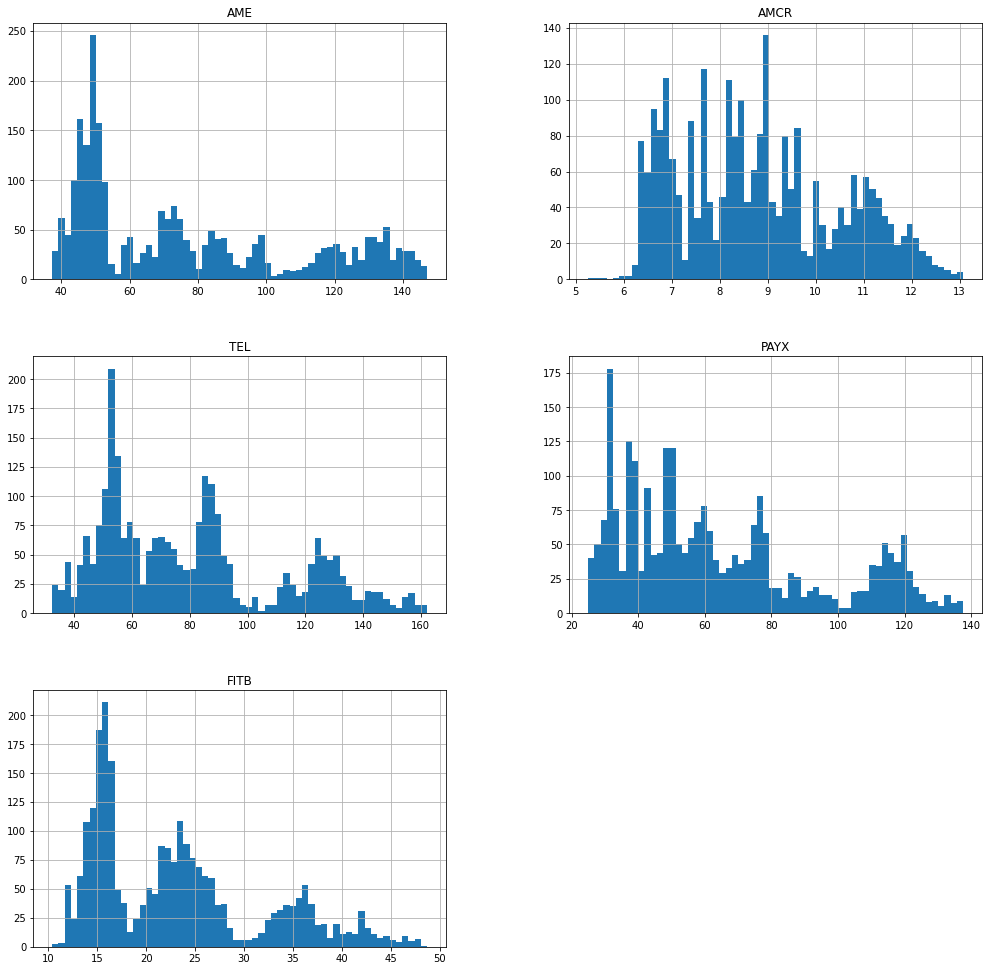

In [11]:
df_prices.sample(5, axis = 1, random_state = 20).hist(figsize = (17, 17), bins = 60)
fig1 = px.line(df_prices.sample(5, axis = 1, random_state = 20), title = "Share price dynamics")
fig1.show()

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [12]:
df_pr = df_prices[df_prices.index  >= '2022-03-03'].median().to_frame(name = "median") # медианная цена за прошедший год
df_i_am_tired = df_inf[['Symbol',"GICS Sector"]].set_index(df_inf['Symbol']).drop(columns = 'Symbol') # таблица с секторами и
df_pr_new = df_pr.join(df_i_am_tired) #соединяем две таблицы
df_pr_new

df_pr_new.groupby("GICS Sector")["median"].quantile(0.95) #находим квантиль

GICS Sector
Communication Services     260.003003
Consumer Discretionary    1763.130005
Consumer Staples           243.992062
Energy                     165.014986
Financials                 350.159805
Health Care                523.568919
Industrials                432.061172
Information Technology     406.481459
Materials                  289.814917
Real Estate                308.903888
Utilities                  140.342722
Name: median, dtype: float64

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [13]:
df_prices_diff = df_prices.diff()
df_prices_shift = df_prices.shift(1)

df_r = df_prices_diff / df_prices_shift
df_r = df_r.iloc[1:, :] #удаляем 1 строку
df_r

A       AAL       AAP      AAPL      ABBV       ABC  \
Date                                                                     
2013-03-06  0.013596  0.037010 -0.010006 -0.012710  0.006132  0.004350   
2013-03-07  0.000231  0.017159  0.000525  0.011559 -0.006624 -0.008251   
2013-03-08 -0.005087  0.006748  0.008135  0.002648 -0.004001  0.008319   
2013-03-11 -0.005112  0.014075  0.008980  0.014245  0.008838  0.001444   
2013-03-12 -0.004439  0.024455 -0.002193 -0.021559 -0.013273  0.002060   
...              ...       ...       ...       ...       ...       ...   
2023-02-27  0.006940  0.004499  0.012820  0.008248  0.010281 -0.012234   
2023-02-28 -0.001477  0.022393  0.030790 -0.003448 -0.002463 -0.006831   
2023-03-01 -0.031415  0.003129 -0.042357 -0.014246  0.008902  0.006107   
2023-03-02  0.030252  0.005614  0.002809  0.004129 -0.005732 -0.010287   
2023-03-03  0.015953  0.014888 -0.005244  0.035090  0.010882  0.008070   

                ABNB       ABT      ACGL       ACN  ...       XOM      XRAY  \
Date                                                ...                       
2013-03-06       NaN -0.011537  0.001207  0.006370  ... -0.000558  0.006665   
2013-03-07       NaN  0.004669  0.013869  0.002067  ... -0.009491  0.005912   
2013-03-08       NaN  0.007262  0.003965  0.010056  ...  0.002931  0.004701   
2013-03-11       NaN  0.007208  0.003555 -0.000638  ...  0.002136  0.002807   
2013-03-12       NaN  0.001432 -0.000197 -0.003576  ...  0.000000 -0.002567   
...              ...       ...       ...       ...  ...       ...       ...   
2023-02-27  0.006108 -0.006868  0.000578 -0.001051  ... -0.001806  0.006408   
2023-02-28 -0.002024  0.019545  0.011415 -0.002629  ... -0.005789  0.101881   
2023-03-01 -0.019873 -0.008750  0.013857 -0.007381  ...  0.008916 -0.018650   
2023-03-02  0.012828  0.017852 -0.000986  0.006336  ...  0.004599  0.008565   
2023-03-03  0.027374  0.017734  0.005642  0.014853  ...  0.012657  0.028132   

                 XYL       YUM       ZBH      ZBRA      ZION        ZM  \
Date                                                                     
2013-03-06  0.031283  0.009201 -0.007121 -0.001783  0.023673       NaN   
2013-03-07 -0.032038  0.005081 -0.005313 -0.003796  0.007177       NaN   
2013-03-08  0.001057  0.006989  0.006810  0.009413  0.001584       NaN   
2013-03-11  0.011607  0.001772  0.004510  0.009547  0.013043       NaN   
2013-03-12 -0.007998  0.013119  0.006073  0.001100 -0.006243       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-02-27  0.001465 -0.002050  0.004890  0.014764  0.002387 -0.002841   
2023-02-28  0.000975  0.004661  0.004623  0.013570  0.004564  0.011801   
2023-03-01 -0.015197 -0.007550 -0.014451  0.006961 -0.003556 -0.066631   
2023-03-02  0.011475  0.019651  0.007454  0.012304 -0.042228  0.014507   
2023-03-03  0.016333  0.007694  0.026262  0.011076  0.019044  0.002548   

                  ZS       ZTS  
Date                            
2013-03-06       NaN -0.012832  
2013-03-07       NaN  0.020975  
2013-03-08       NaN -0.013599  
2013-03-11       NaN  0.002640  
2013-03-12       NaN -0.010533  
...              ...       ...  
2023-02-27  0.007335 -0.005170  
2023-02-28 -0.005234  0.009246  
2023-03-01 -0.020663  0.003413  
2023-03-02  0.044301  0.006027  
2023-03-03 -0.111012  0.011745  

[2517 rows x 520 columns]

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ Можно сказать, что распределение доходностей по акциям очень похоже на нормальное распределение  с мат ожиданием = 0. Да, по ящику с усами видно, что довольно много выбросов, так как много точек выходят за границы ящика и довольно сильно.

Text(0.5, 1.0, 'Share income dynamics')

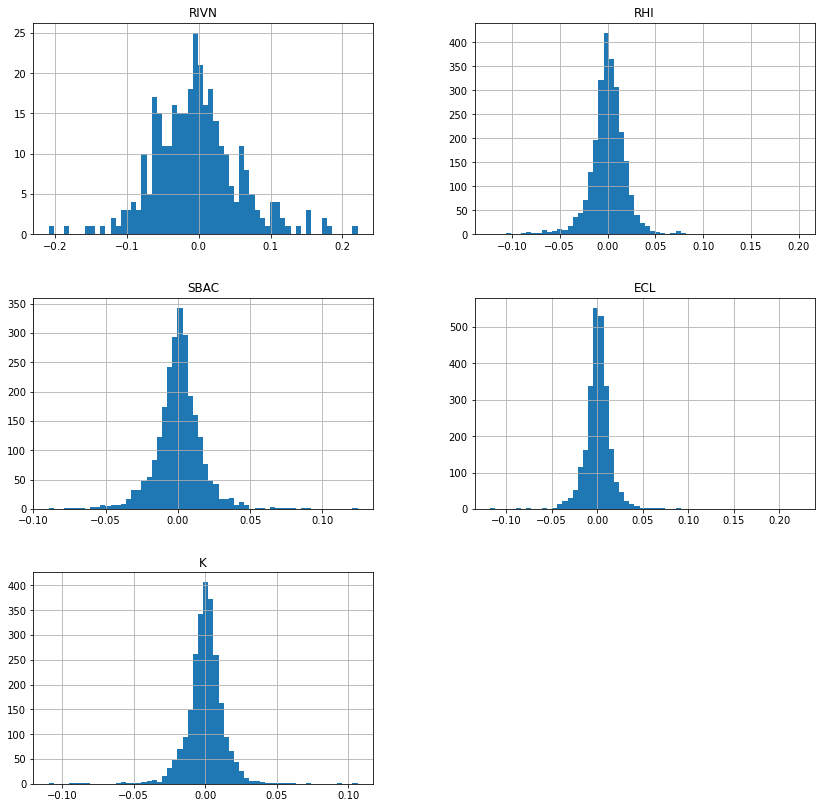

In [14]:
df_r.sample(5, axis = 1, random_state = 4).hist(figsize = (14, 14), bins = 60)
plt.title("Share income dynamics")

Text(0.5, 1.0, 'Share income dynamics')

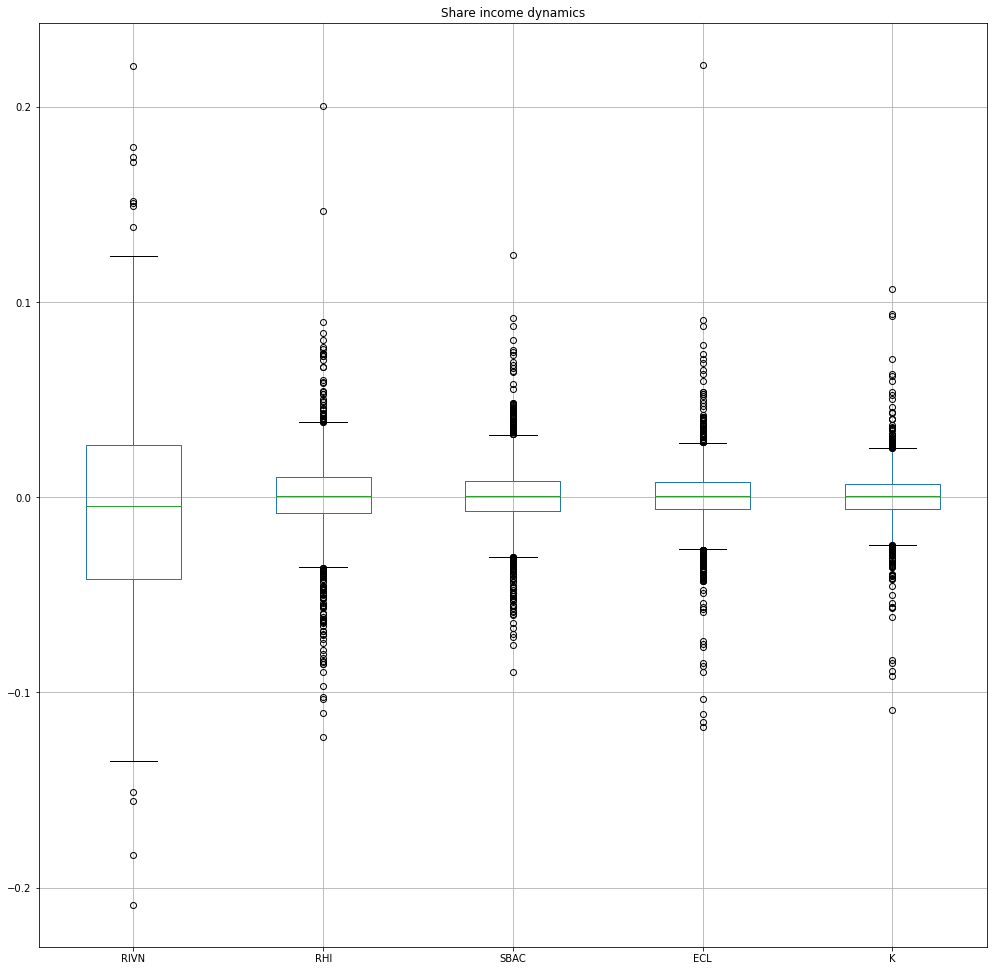

In [16]:
df_r.sample(5, axis = 1, random_state = 4).boxplot(figsize = (17, 17))
plt.title("Share income dynamics")

In [17]:
fig2 = px.line(df_r.sample(5, axis = 1, random_state = 4), title = "Share income dynamics")
fig2.show()

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

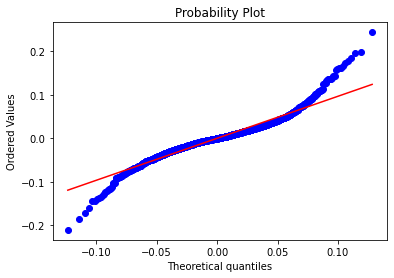

In [18]:
ax = plt.subplot(111)
x = df_r['TSLA'].values
sts.probplot(x, dist="norm", sparams=(x.mean(), x.std()), plot=ax);

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [19]:
df_train = df_r[df_r.index  < '2022-03-03']
df_test = df_r[df_r.index  >= '2022-03-03']

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [20]:
R = df_train.mean(axis = 0).mean() # средняя доходность по всем компаниям
print(f'Средняя доходность: {R}')

df_train_sort_R = df_train.mean(axis = 0).sort_values()
df_train_low_R = df_train_sort_R[:10].index.tolist() #наименее доходные
print('10 самых убыточных компаний:', ', '.join(df_train_low_R))

df_train_high_R = df_train_sort_R[-10:].index.tolist()
print(f'10 самых доходных компаний:', ', '.join(df_train_high_R))

if "TSLA" in df_train_high_R:
    print("Тесла в списке самых доходных компаний")
else: print("Маска на мыло")

Средняя доходность: 0.0007937713826460869
10 самых убыточных компаний: RIVN, VTRS, KHC, GE, IBM, LUMN, KMI, SLB, BEN, WBD
10 самых доходных компаний: CRWD, TSLA, ZS, ENPH, CARR, DDOG, GFS, MRNA, LCID, CEG
Тесла в списке самых доходных компаний


Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [21]:
STD = df_train.std()
print(f'Стандартное отклонение : {STD.mean()}')

df_train_sort_std = df_train.std(axis = 0).sort_values()
df_train_low_std = df_train_sort_std[:10].index.tolist() # самые безрисковые
print(f'10 самых безрисковых компаний:', ', '.join(df_train_low_std))

df_train_high_std = df_train_sort_std[-10:].index.tolist() # самые рискованные
print(f'10 самых рисковых компаний:', ', '.join(df_train_high_std))

# Проверка есть ли тикер Теслы среди самых рискованных компаний
if "TSLA" in df_train_high_std:
    print("Тесла в списке самых доходных компаний")
else: print("Маска на мыло")

Стандартное отклонение : 0.01980490636680324
10 самых безрисковых компаний: VZ, JNJ, KO, PG, RSG, WM, PEP, CL, MMC, COST
10 самых рисковых компаний: DDOG, CRWD, SEDG, GFS, ZM, PDD, MRNA, ENPH, LCID, RIVN
Маска на мыло


Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [22]:
df_result = pd.DataFrame({"Ticker":df_train.mean().index, "std": df_train.std(), "R": df_train.mean()})
df_result.set_index("Ticker", inplace = True)
df_result

std         R
Ticker                    
A       0.015556  0.000808
AAL     0.031476  0.000579
AAP     0.020050  0.000659
AAPL    0.017579  0.001268
ABBV    0.017331  0.000925
...          ...       ...
ZBRA    0.023282  0.001256
ZION    0.020683  0.000733
ZM      0.042788  0.001823
ZS      0.037999  0.002762
ZTS     0.015534  0.000919

[520 rows x 2 columns]

Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Да, можно. Например, акции компании Carrier Global Corporation с тикером CARR.

In [23]:
fig = px.scatter(df_result, x = "std", y = 'R', color = df_result.index)
fig.add_trace(go.Scatter(x=[df_result.loc["TSLA"][0]], y=[df_result.loc["TSLA"][1]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig.show()



Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [24]:
VaR = df_train.quantile(q = 0.05) * (-1)
print(f'5% VaR: {VaR[1] * (-1)}')

df_train_low_VaR = VaR.sort_values()[:10].index.tolist() # самые безрисковые
print(f'10 самых безрисковых компаний:', ', '.join(df_train_low_VaR))

df_train_high_VaR = VaR.sort_values()[-10:].index.tolist() # самые рискованные
print(f'10 самых рисковых компаний:', ', '.join(df_train_high_VaR))

# добавим получившиеся значения в нашу таблицу
df_VaR = VaR.to_frame(name = "VaR")
df_result = df_result.join(df_VaR)


5% VaR: -0.044087459072389
10 самых безрисковых компаний: WM, PG, KO, RSG, MCD, PEP, JNJ, SO, VZ, CL
10 самых рисковых компаний: SEDG, DDOG, CEG, GFS, ZM, PDD, MRNA, ENPH, LCID, RIVN


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

In [25]:
fig1 = px.scatter(df_result, x = "R", y = 'VaR', color = df_result.index)
fig1.add_trace(go.Scatter(x=[df_result.loc["TSLA"][1]], y=[df_result.loc["TSLA"][2]], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig1.show()


$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [26]:
VaR_negat = df_train.quantile(q = 0.05).to_frame(name = "VaR")

ES = df_train['TSLA'][df_train['TSLA'] < float(VaR_negat.loc['TSLA'])].mean()
print(f'ES для Теслы: {ES}')

print("Потеряем:", 1000 * ES)

income = float(df_train.quantile(q = 0.95).to_frame().mean()) * 1000
print("Заработаем:", income)

ES для Теслы: -0.07554044469806388
Потеряем: -75.54044469806388
Заработаем: 28.51507074826718


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [27]:
ES_all = df_train[df_train < df_train.quantile(q = 0.05)].mean() * (-1)
df_ES_all = ES_all.to_frame(name = "ES")
df_result = df_result.join(df_ES_all)

In [28]:
df_result = df_result.round(3)
df_result_sorted = df_result.sort_values(by = ['ES'], ascending = False)

In [29]:
df_result_sorted.reset_index(inplace = True)

In [30]:
df_result_sorted.rename(columns = {"R":"r"}, inplace = True)
df_result_sorted.to_csv("var_result.csv", index = False, sep = ",")

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [627]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

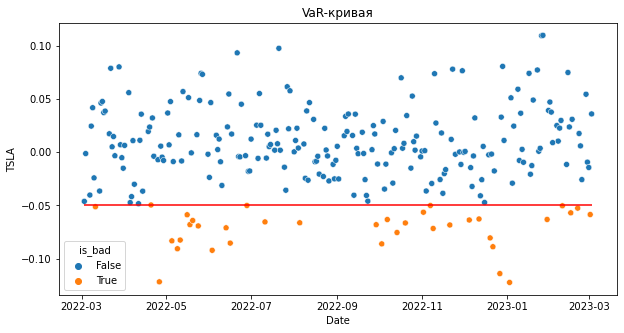

In [628]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

  ---------

# Часть 2: чековая

За задание можно получить $50$ баллов. Мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [31]:
df = pd.read_csv('data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


id   fielddate           product
0  1808  21-07-2015    tropical fruit
1  2552  05-01-2015        whole milk
2  2300  19-09-2015         pip fruit
3  1187  12-12-2015  other vegetables
4  3037  01-02-2015        whole milk

## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [32]:
num_uniq = df.id.nunique()
print("Количество уникальных заказов:", num_uniq)

Количество уникальных заказов: 3898


Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

Топ-10 самых популярных товаров:  whole milk, other vegetables, rolls/buns, soda, yogurt, root vegetables, tropical fruit, bottled water, sausage, citrus fruit


Text(0, 0.5, 'Количество покупок')

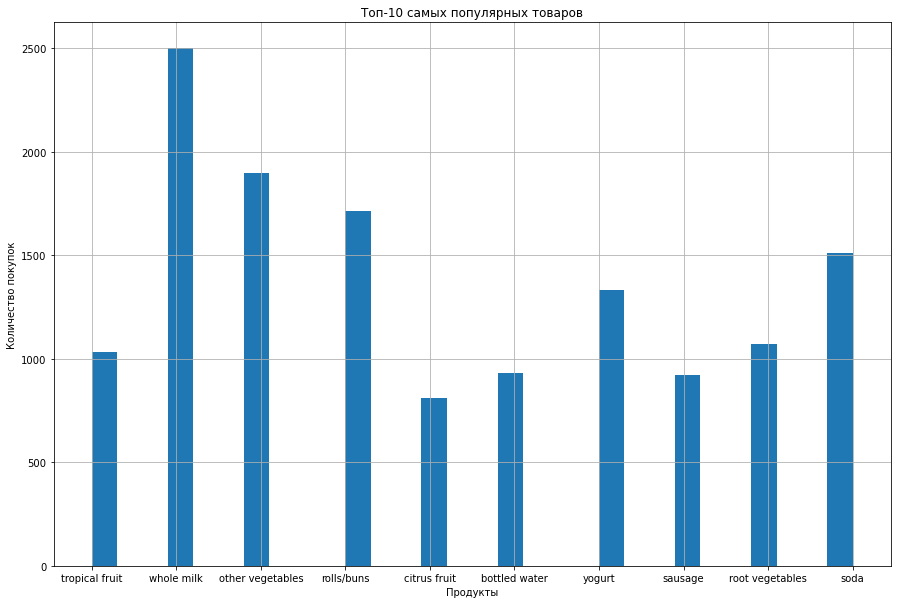

In [33]:
top_prods = df['product'].value_counts()[:10].index.tolist()
print('Топ-10 самых популярных товаров: ', ', '.join(top_prods))

df['product'].loc[df['product'].isin(top_prods)].hist(figsize = (15, 10), bins = 30)
plt.title("Топ-10 самых популярных товаров")
plt.xlabel("Продукты")
plt.ylabel("Количество покупок")

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

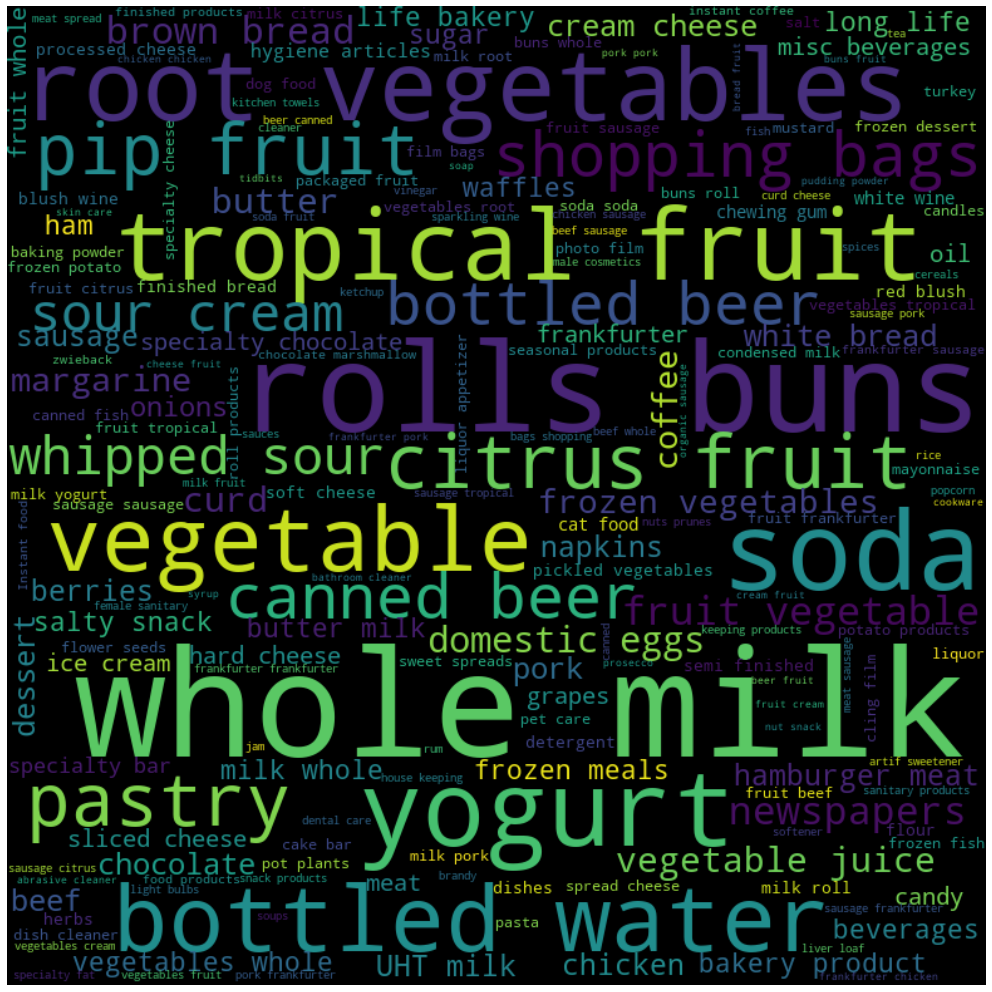

In [36]:
from wordcloud import WordCloud

prods = df['product'].value_counts().index
my_list = df['product'].loc[df['product'].isin(prods)].tolist()
text = (" ").join(my_list)
wordcloud = WordCloud(width=780, height=780, margin=0).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.rcParams["figure.figsize"] = [18, 18]
plt.show()


__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [37]:
# группируем данные по id и product
df_group = df.groupby(['id', 'product']).size().reset_index(name = "cnt")

# создаем сводную таблицу с количеством каждого вида продукта для каждого id
pivot_table = pd.pivot_table(df_group,
               values = ["cnt"],
               index = ['id'],
               columns = ["product"],
               fill_value = 0)

В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

Text(141.0, 0.5, 'Product')

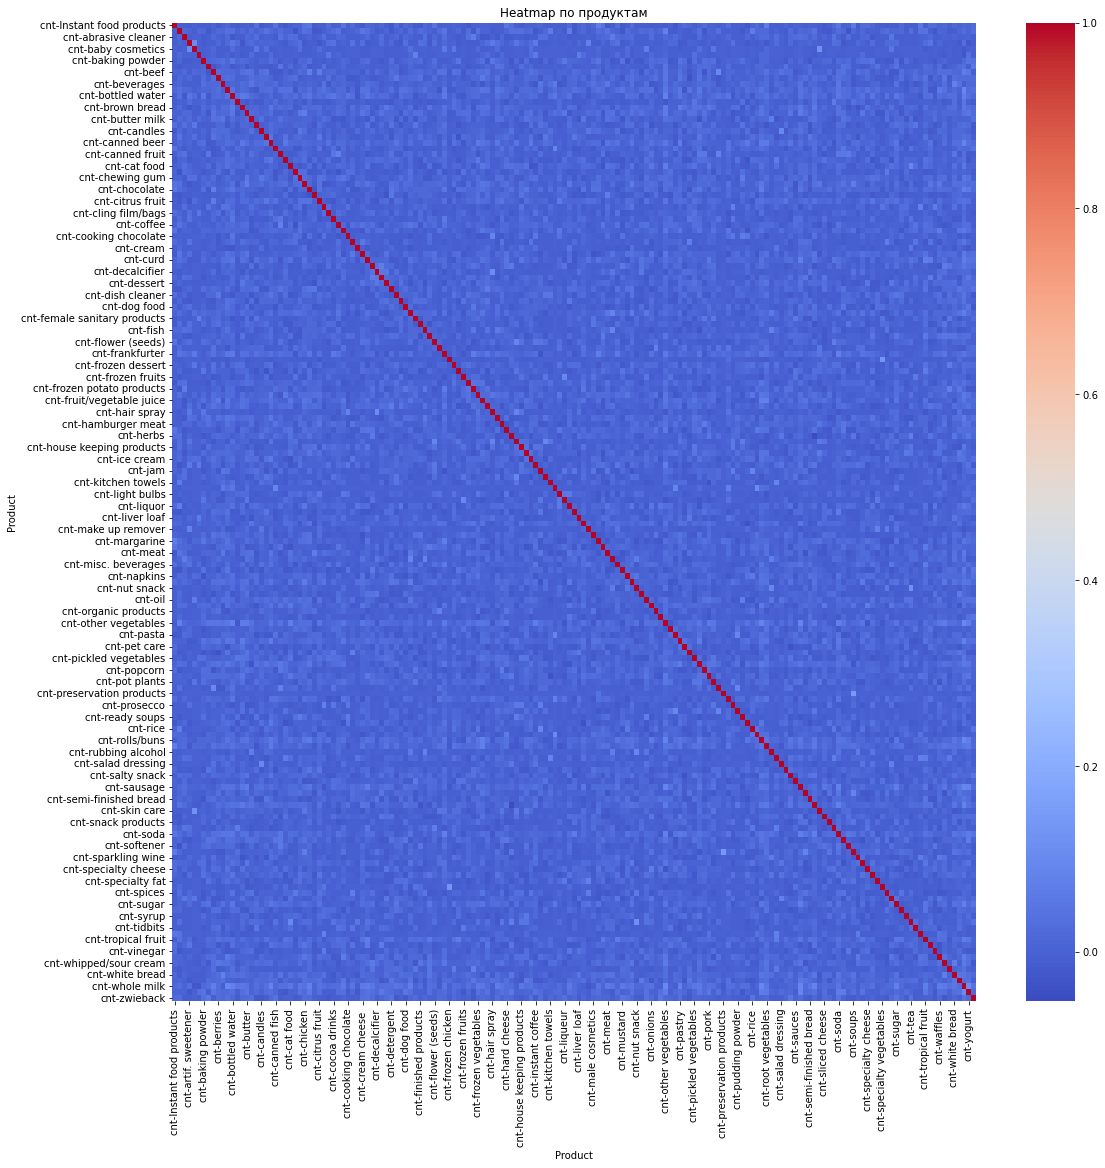

In [38]:
corr_matrix = pivot_table.corr()
sns.heatmap(corr_matrix, cmap='coolwarm').set_title("Heatmap по продуктам")
plt.xlabel('Product')
plt.ylabel('Product')

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [39]:
# убираем лишние уровни
corr_matrix = corr_matrix.droplevel(level = 0, axis = 0)
corr_matrix = corr_matrix.droplevel(level = 0, axis = 1)

In [40]:
corr_egg_max = corr_matrix['domestic eggs'].sort_values()[-11:-1].index.tolist() #сильнее всех коррелируют 
print(f'Продукты сильнее всего коррелирующие с яйцами:', ', '.join(corr_egg_max))

Продукты сильнее всего коррелирующие с яйцами: specialty bar, white wine, fruit/vegetable juice, coffee, oil, meat, rubbing alcohol, newspapers, whole milk, meat spreads


In [42]:
corr_egg_min = corr_matrix['domestic eggs'].sort_values()[:10].index.tolist()
print(f'Продукты мешающие купить яйца:', ', '.join(corr_egg_min))

Продукты мешающие купить яйца: pet care, cooking chocolate, ready soups, dessert, cream, soft cheese, specialty vegetables, frozen fruits, ketchup, organic products


Какие два продукта коррелируют сильнее всего? 

In [43]:
corr_matrix_sort = corr_matrix[corr_matrix != 1].max().sort_values(ascending = False)
answer = corr_matrix_sort[:2].index.tolist()
print(f'Два продукта коррелирующие сильнее всего: {answer[0]} и {answer[1]}')

Два продукта коррелирующие сильнее всего: preservation products и soups


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ Во-первых, корреляция пирсона чувствительна к выбросам, что искажает результаты. Во-вторых, она строится на линейной связи, что не всегда точно описывает истинную взаимосвязь и может ложно показывать слишком низкую или слишком высокую корреляцию.


## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [44]:
def cont(x):
    if x != 1 and x != 0:
        x = 1
    return x

# создаем таблицу сопряженности
contingency_table = pd.crosstab(df.id, df['product'])
contingency_table = contingency_table.applymap(cont)

contingency_table2 = contingency_table.loc[:, contingency_table.sum() >= 10]

In [ ]:
from sklearn.metrics import matthews_corrcoef

df_matthews = pd.DataFrame(columns = ['product_1', "product_2",
                                      'matthews_corrcoef'])

for res in combinations(contingency_table2.columns, 2):
    x = contingency_table2[res[0]]
    y = contingency_table2[res[1]]
    coef = matthews_corrcoef(x, y)  
    row = {'product_1': res[0], 'product_2': res[1], 'matthews_corrcoef': coef}
    df_matthews = df_matthews.append(row, ignore_index=True)

df_matthews_sort = df_matthews.sort_values(by = 'matthews_corrcoef',
                                           ascending = False).head(100)
df_matthews_sort.to_csv("result_matthews.csv", index = False, sep = ",")

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [ ]:
all_id = contingency_table.shape[0]
prob_both = contingency_table[["whole milk", 'domestic eggs']].all(axis = 1).mean() 
prob_milk = contingency_table["whole milk"].mean()
prob_eggs = contingency_table['domestic eggs'].mean()

lift_milk_eggs = prob_both / (prob_milk * prob_eggs)
print(lift_milk_eggs)

__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [ ]:
df_lift = pd.DataFrame(columns = ['product_1', "product_2", 'lift'])

for res in combinations(contingency_table2.columns, 2):
    prob_12 = contingency_table2[[res[0], res[1]]].all(axis = 1).mean()
    prob1 = contingency_table2[res[0]].mean()
    prob2 = contingency_table2[res[1]].mean()
    
    prob = prob_12 / (prob1 * prob2)
    row = {'product_1': res[0], 'product_2': res[1], 'lift': prob}
    df_lift = df_lift.append(row, ignore_index=True)

df_lift_sort = df_lift.sort_values(by = 'lift', ascending = False).head(100)
df_lift_sort.to_csv("result_lift.csv", index = False, sep = ",")